## Cơ bản: Kích các nút, xong quét và lưu. 

## Ver 1: 


### 1.1 Chạy được 80%

B1: Truy cập trang này: https://ai.google.dev/competition/
B2: Đợi vài giây, load xong trang thì Kích vào element: 
<a class="gemini-btn gemini-gradient  gemini-type-btn gc-analytics-event" data-category="content_click" data-label="https://ai.google.dev/competition/vote" data-action="Vote for your favorite apps" href="/competition/vote" rel="">
      <span>Vote for your favorite apps</span>
    </a>

B3: Đợi vài giây, load xong trang thì Kích vào element: 
<div class="gemini-btn gemini-secondary gemini-start-button gemini-type-btn">
      <span>Start&nbsp;voting</span>
    </div>

B4:Đợi vài giây Ấn vào element: <div class="gemini-vote-card-glow"></div> 
và quét toàn bộ văn bản

B5:
- Ấn nút mũi tên quay lại 
- Sau đó lặp lại bước 4 số lần là: 3 

B6:
- Lưu thông tin văn bản vào file txt theo thứ tự 1, 2, 3, ...

### Ver 1.2 - Update bước 4 

B3: thì bug nên tạm thời kick tay để vào 

B4:Đợi vài giây Ấn vào element: <div class="gemini-vote-card-glow"></div> 
Sau khi ấn thì Viết vào file text. 
- Ý tưởng thứ mấy: 
- lưu lại đường link của trang 
- Quét lưu VĂN BẢN (KO PHẢI HTML)(kể cả đường đường link youtube ) ở XPath: 
//*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]
Note CHỈNH SỬA THÊM: 
1. Trong phần XPath://*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[3]/div[1]/div[1]/p[2] này có các đoạn thẻ <br> thể hiện việc xuống dòng. 
- Trong output tôi lại thấy nó viết liền => tôi muốn nó cũng xuống dòng
- Bạn muốn giữ nguyên cấu trúc xuống dòng của các thẻ <br> trong output, mà không hiển thị thẻ HTML.

2. Tìm link youtube ở XPath: \
    //*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[2]/div/div
    //*[@id="movie_player"]/div[3]/div[4]/button[4]

```
<div class="ytp-cued-thumbnail-overlay-image" style="background-image: url(&quot;https://i.ytimg.com/vi/-of676t_lWI/maxresdefault.jpg?sqp=-oaymwEmCIAKENAF8quKqQMa8AEB-AH-CYAC0AWKAgwIABABGHIgSCg6MA8=&amp;rs=AOn4CLCsx5Gs9XBhAXecYI81D03e_7ERUA&quot;);"></div>
```

ĐÂY LÀ CÁCH MÀ trang web trên đang lưu trữ video youtube. 

```
Tôi hiểu rồi. Cảm ơn bạn đã cung cấp thêm thông tin chi tiết. Trong trường hợp này, chúng ta chỉ cần tập trung vào việc trích xuất URL của hình thu nhỏ (thumbnail) từ thuộc tính style của phần tử có class ytp-cued-thumbnail-overlay-image. Từ URL này, chúng ta có thể lấy được ID của video YouTube. Đây là cách chúng ta có thể cập nhật code để xử lý trường hợp cụ thể này:
```

```
<div class="gemini-project-video">
                        <devsite-video video-id="XH18PdmG9ys"> <iframe frameborder="0" allowfullscreen="" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" width="640" height="360" src="https://www.youtube.com/embed/XH18PdmG9ys?origin=https%3A%2F%2Fai.google.dev&amp;autoplay&amp;controls&amp;embed_domain&amp;enablejsapi=1&amp;end&amp;hl&amp;showinfo&amp;start&amp;video-id=XH18PdmG9ys&amp;widgetid=7" id="widget8" data-gtm-yt-inspected-168640146_50="true" data-gtm-yt-inspected-183356566_95="true" data-title="YouTube video player" title="earth&amp;us"></iframe></devsite-video>
                    </div>
```

=> Đã lấy được video thành công. 
NHẬN RA: LẤY VIDEO LÀM MÉO GÌ NHỈ, nếu thấy idea hay, họ tự khắc ấn vào link bài gốc và tự có được video xem ngay trên web luôn rồi mà. 

In [1]:


# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.action_chains import ActionChains
# from bs4 import BeautifulSoup
# import time
# import os

# def wait_for_user_action(driver, message):
#     print(message)
#     input("Nhấn Enter sau khi bạn đã hoàn thành hành động...")
#     time.sleep(5)  # Đợi thêm 5 giây sau khi người dùng nhấn Enter


# import re

# # ... existing code ...

# def extract_youtube_links(soup):
#     youtube_links = []
    
#     # Tìm tất cả các thẻ devsite-video
#     devsite_videos = soup.find_all('devsite-video')
#     for video in devsite_videos:
#         # Lấy video-id từ thuộc tính của devsite-video
#         video_id = video.get('video-id')
#         if video_id:
#             youtube_links.append(f'https://www.youtube.com/watch?v={video_id}')
        
#         # Tìm iframe bên trong devsite-video
#         iframe = video.find('iframe')
#         if iframe:
#             src = iframe.get('src')
#             if src and 'youtube.com/embed/' in src:
#                 video_id = src.split('/')[-1].split('?')[0]
#                 youtube_links.append(f'https://www.youtube.com/watch?v={video_id}')
    
#     # Tìm tất cả các iframe trực tiếp (để đảm bảo)
#     iframes = soup.find_all('iframe', src=lambda x: x and 'youtube.com/embed/' in x)
#     for iframe in iframes:
#         src = iframe.get('src')
#         video_id = src.split('/')[-1].split('?')[0]
#         youtube_link = f'https://www.youtube.com/watch?v={video_id}'
#         if youtube_link not in youtube_links:
#             youtube_links.append(youtube_link)
    
#     return youtube_links


# # B1: Truy cập trang này: https://ai.google.dev/competition/
# url = "https://ai.google.dev/competition/"
# driver = webdriver.Chrome()
# driver.get(url)

# # B2: Đợi và kích vào "Vote for your favorite apps"
# # B2: Đợi vài giây, load xong trang thì Kích vào element: 
# # <a class="gemini-btn gemini-gradient  gemini-type-btn gc-analytics-event" data-category="content_click" data-label="https://ai.google.dev/competition/vote" data-action="Vote for your favorite apps" href="/competition/vote" rel="">
# #       <span>Vote for your favorite apps</span>
# #     </a>
# # XPath: //*[@id="gemini-overview"]/section/div[2]/div/div/article/div[4]/a

# try:
#     vote_button = WebDriverWait(driver, 10).until(
#         EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#     )
#     driver.execute_script("arguments[0].click();", vote_button)
#     time.sleep(5)  # Đợi trang mới tải xong
# except Exception as e:
#     print(f"Không thể nhấp vào 'Vote for your favorite apps': {e}")
#     driver.save_screenshot("error_vote_apps.png")
#     driver.quit()
#     exit()

# # B3: Đợi vài giây, load xong trang thì Kích vào element: 
# # <div class="gemini-btn gemini-secondary gemini-start-button gemini-type-btn">
# #       <span>Start&nbsp;voting</span>
# #     </div>
# try:
#     print("Đang tìm nút 'Start voting'...")
#     start_voting = WebDriverWait(driver, 10).until(
#         EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'Start voting')]"))
#     )
#     print("Đã tìm thấy nút 'Start voting'. Đang nhấp vào...")
#     driver.execute_script("arguments[0].click();", start_voting)
#     print("Đã nhấp vào 'Start voting'. Đang đợi 5 giây...")
#     time.sleep(5)
# except Exception as e:
#     print(f"Không thể nhấp vào 'Start voting': {e}")
#     wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")

# # B4 and B5: Collect ideas and navigate back
# # B4:Đợi vài giây Ấn vào element: <div class="gemini-vote-card-glow"></div> 
# # Sau khi ấn thì Viết vào file text. 
# # - Ý tưởng thứ mấy: 
# # - lưu lại đường link của trang 
# # - Quét lưu VĂN BẢN (KO PHẢI HTML)(kể cả đường đường link youtube ) ở XPath: 
# # //*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]
# # Note CHỈNH SỬA THÊM: 

# # B5:
# # - Ấn nút mũi tên quay lại 
# # - Sau đó lặp lại bước 4 số lần là: 3 
# for i in range(2):
#     try:
#         print(f"Đang tìm ý tưởng thứ {i+1}...")
#         element = WebDriverWait(driver, 20).until(
#             EC.element_to_be_clickable((By.CSS_SELECTOR, "div.gemini-vote-card-glow"))
#         )
#         print(f"Đã tìm thấy ý tưởng thứ {i+1}. Đang scroll đến element...")
#         driver.execute_script("arguments[0].scrollIntoView(true);", element)
#         time.sleep(2)
#         print("Đang nhấp vào element...")
#         ActionChains(driver).move_to_element(element).click().perform()
#         print("Đã nhấp vào element. Đang đợi 5 giây...")
#         time.sleep(5)
        
#         # Lưu đường link của trang
#         current_url = driver.current_url
#         print(current_url)
        
#         print("Đang quét thông tin văn bản...")
#         # Quét thông tin văn bản từ XPath
#         text_element = WebDriverWait(driver, 20).until(
#             EC.presence_of_element_located((By.XPATH, '//*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]'))
#         )
        
#         # Sử dụng BeautifulSoup để trích xuất văn bản và link
#         soup = BeautifulSoup(text_element.get_attribute('outerHTML'), 'html.parser')

#         # 1. Trong phần XPath://*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[3]/div[1]/div[1]/p[2] này có các đoạn thẻ <br> thể hiện việc xuống dòng. 
#         # - Trong output tôi lại thấy nó viết liền => tôi muốn nó cũng xuống dòng
#         # - Bạn muốn giữ nguyên cấu trúc xuống dòng của các thẻ <br> trong output, mà không hiển thị thẻ HTML.

        
#         # Trích xuất văn bản
#         idea_text = ''
#         for element in soup.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
#             if element.name == 'p' and element.find_parent('section'):
#                 # Xử lý các thẻ p trong section, giữ nguyên cấu trúc ngắt dòng
#                 for content in element.contents:
#                     if content.name == 'br':
#                         idea_text += '\n'
#                     else:
#                         idea_text += content.string if content.string else ''
#                 idea_text += '\n\n'
#             else:
#                 idea_text += element.get_text(strip=True) + '\n\n'
                
#         # Trong vòng lặp chính của bạn
#         youtube_links = extract_youtube_links(soup)
#         print(f"Found YouTube links: {youtube_links}")
        
#         # Viết vào file text
#         with open('ideas.txt', 'a', encoding='utf-8') as f:
#             f.write(f"Ý tưởng thứ {i+1}:\n")
#             f.write(f"Link: {current_url}\n")
#             f.write(f"Nội dung:\n{idea_text}\n")
#             if youtube_links:
#                 f.write("Link YouTube:\n")
#                 for link in youtube_links:
#                     f.write(f"{link}\n")
#             f.write("\n" + "-"*50 + "\n\n")


        
#         print(f"Đã thu thập và lưu ý tưởng thứ {i+1}")
        
#         # Quay lại trang trước
#         driver.back()
#         time.sleep(5)  # Tăng thời gian chờ sau khi quay lại
        
#     except Exception as e:
#         print(f"Lỗi khi thu thập ý tưởng thứ {i+1}: {e}")
#         driver.save_screenshot(f"error_idea_{i+1}.png")
#         wait_for_user_action(driver, f"Vui lòng xử lý vấn đề và nhấp vào ý tưởng thứ {i+1} thủ công.")

# driver.quit()

# # Kiểm tra nội dung file
# if os.path.exists('ideas.txt'):
#     with open('ideas.txt', 'r', encoding='utf-8') as f:
#         content = f.read()
#         if content.strip():
#             print("File ideas.txt đã được tạo và có nội dung.")
#         else:
#             print("File ideas.txt tồn tại nhưng trống.")
# else:
#     print("File ideas.txt không tồn tại.")

# print("Quá trình crawl đã hoàn tất.")

Đang tìm nút 'Start voting'...


## Ver 1.3 - BỎ PHẦN LẤY VIDEO ở bước 2
1. Bỏ phần lấy video ở bước 2 
```
- các phương thức chính được sử dụng để tìm và tương tác với các phần tử trên trang web? 
- Trong code sử dụng phương pháp nào, tại sao lại dùng? 
- Trong trường hợp muốn tương tác với phần nào thì nên dùng phương pháp nào? 
- Dùng chung 1 phương pháp được ko? Có nên ko 
```

```

Tôi sẽ trả lời từng câu hỏi của bạn:

1. Các phương thức chính để tìm và tương tác với phần tử:
   - XPath
   - CSS Selector
   - ID
   - Name
   - Class name
   - Tag name
   - Link text
   - Partial link text

2. Trong code, chủ yếu sử dụng:
   - XPath
   - CSS Selector
   
   Lý do sử dụng:
   - XPath: Linh hoạt, có thể định vị phần tử phức tạp dựa trên cấu trúc DOM hoặc nội dung.
   - CSS Selector: Nhanh hơn XPath, dễ đọc với các phần tử có class hoặc id rõ ràng.

3. Hướng dẫn chọn phương pháp:
   - ID: Ưu tiên nhất nếu phần tử có id duy nhất.
   - CSS Selector: Tốt cho phần tử có class hoặc cấu trúc CSS đơn giản.
   - XPath: Khi cần tìm phần tử dựa trên text hoặc cấu trúc phức tạp.
   - Name, Class name: Cho các form input hoặc nhóm phần tử cùng class.
   - Link text, Partial link text: Cho các liên kết.

4. Về việc dùng chung một phương pháp:
   - Có thể dùng chung, nhưng không nên.
   - Ưu điểm: Nhất quán, dễ bảo trì.
   - Nhược điểm: Có thể không hiệu quả hoặc phức tạp không cần thiết trong một số trường hợp.
   - Nên kết hợp các phương pháp để tối ưu hiệu suất và độ tin cậy của script.

Tóm lại, nên chọn phương pháp phù hợp nhất cho từng trường hợp cụ thể, ưu tiên các phương pháp đơn giản và hiệu quả trước (như ID), sau đó mới đến các phương pháp phức tạp hơn khi cần thiết.
```



2. Phân chia rõ hơn các phần của mục Nội dung: 
- //*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[3]/div[1]/div[1]
- //*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[3]/div[1]/div[2]
- //*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[3]/div[1]/div[3]

<div class="gemini-project-description"></div>
<div class="gemini-project-tools"></div>
<div class="gemini-project-about"></div>
```
- trong description bạn có bảo tồn thẻ <br> ko ? (tức là có thẻ br thì nó sẽ là xuống dòng ý)

```
idea_text = ''
for element in soup.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
    if element.name == 'p' and element.find_parent('section'):
        # Xử lý các thẻ p trong section, giữ nguyên cấu trúc ngắt dòng
        for content in element.contents:
            if content.name == 'br':
                idea_text += '\n'
            else:
                idea_text += content.string if content.string else ''
        idea_text += '\n\n'
    else:
        idea_text += element.get_text(strip=True) + '\n\n'
```

```
        # Tìm và trích xuất nội dung từ các div cụ thể
        description_div = soup.find('div', class_='gemini-project-description')
        if description_div:
            description = description_div.get_text(strip=True)

        tools_div = soup.find('div', class_='gemini-project-tools')
        if tools_div:
            tools = tools_div.get_text(strip=True)

        about_div = soup.find('div', class_='gemini-project-about')
        if about_div:
            about = about_div.get_text(strip=True)

        # Tổng hợp nội dung
        idea_text = f"Description:\n{description}\n\nTools:\n{tools}\n\nAbout:\n{about}"
```
```
Tôi hiểu rồi. Bạn muốn kết hợp cách xử lý các thẻ <br> từ đoạn code đầu tiên với việc phân chia rõ ràng các phần nội dung (Description, Tools, About) từ đoạn code thứ hai. Đây là cách chúng ta có thể kết hợp cả hai phương pháp:
```

- Tại sao thẻ description thì lấy được thông tin, thẻ about và thẻ Built with thì ko. 
=> Thử kiểm tra nội dung HTML kỹ hơn thay vì chỉ class. 
Giải thích:
1. extract_description(): Trích xuất nội dung từ thẻ <p> có class gemini-type-b1.
2. extract_tools(): Tìm tất cả các thẻ <li> trong phần Tools và kết hợp chúng.
3. extract_about(): Trích xuất thông tin từ các gemini-project-detail, bao gồm cả nhãn và giá trị.

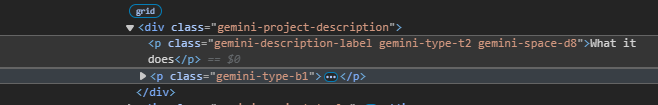

3. 
- Tạo file idea_links.txt nếu chưa có. 
-  Kiểm tra đường link của trang đã có trong idea_links.txt chưa 
Chưa có thì sẽ lưu vào file idea_links.txt và MỚI TIẾN HÀNH QUÉT THÔNG TIN VĂN BẢN 
và thực hiện lưu. 
+, Nếu link đã có thì bỏ qua. 
+, Ngoài ra trong file idea_links.txt sẽ đánh số thứ tự của link 1, 2, 3, ...
Lúc ở file ideas.txt cũng sẽ được đánh số như vậy. 



4. Chuyển output sang file excel với các cột ... (thay vì lưu trữ dạng văn bản như trước)

5. Quên lấy TITLE và discription của title: 
```
element: <title>My Shopping List &nbsp;|&nbsp; Gemini API Developer Competition &nbsp;|&nbsp; Google AI for Developers</title>
full XPath: /html/head/title

element: <meta name="description" content="App that&amp;#39;s about to revolutionize your shopping experience">
full XPath: /html/head/meta[6]
```

In [ ]:



# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.action_chains import ActionChains
# from bs4 import BeautifulSoup
# import time
# import os
# from openpyxl import Workbook
# import re



# def wait_for_user_action(driver, message):
#     print(message)
#     input("Nhấn Enter sau khi bạn đã hoàn thành hành động...")
#     time.sleep(5)  # Đợi thêm 5 giây sau khi người dùng nhấn Enter


# def get_next_idea_number():
#     if not os.path.exists('idea_links.txt'):
#         return 1
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         lines = f.readlines()
#         if not lines:
#             return 1
#         for line in reversed(lines):
#             parts = line.strip().split(':')
#             if len(parts) >= 2:
#                 try:
#                     number = int(''.join(filter(str.isdigit, parts[0])))
#                     return number + 1
#                 except ValueError:
#                     continue
#     return 1  # Nếu không tìm thấy số hợp lệ, bắt đầu từ 1

# def is_link_exists(url):
#     if not os.path.exists('idea_links.txt'):
#         return False
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         return any(url in line for line in f)
    
# def extract_page_info(driver):
#     title = driver.title
#     description = driver.find_element(By.XPATH, '//meta[@name="description"]').get_attribute('content')
#     return title, description

# # Cập nhật hàm save_to_excel
# def save_to_excel(ideas):
#     wb = Workbook()
#     ws = wb.active
#     ws.title = "Ideas"
    
#     headers = ["STT", "Link", "Title", "Meta Description", "Description", "Built with", "About"]
#     for col, header in enumerate(headers, start=1):
#         ws.cell(row=1, column=col, value=header)
    
#     for row, idea in enumerate(ideas, start=2):
#         ws.cell(row=row, column=1, value=idea['stt'])
#         ws.cell(row=row, column=2, value=idea['link'])
#         ws.cell(row=row, column=3, value=idea['title'])
#         ws.cell(row=row, column=4, value=idea['meta_description'])
#         ws.cell(row=row, column=5, value=idea['description'])
#         ws.cell(row=row, column=6, value=idea['built_with'])
#         ws.cell(row=row, column=7, value=idea['about'])
    
#     wb.save("ideas.xlsx")
#     print("Đã lưu dữ liệu vào file ideas.xlsx")
# # Khởi tạo danh sách để lưu các ý tưởng
# ideas = []

# # B1: Truy cập trang này: https://ai.google.dev/competition/
# url = "https://ai.google.dev/competition/"
# driver = webdriver.Chrome()
# driver.get(url)

# # B2: Đợi và kích vào "Vote for your favorite apps"
# # B2: Đợi vài giây, load xong trang thì Kích vào element: 
# # <a class="gemini-btn gemini-gradient  gemini-type-btn gc-analytics-event" data-category="content_click" data-label="https://ai.google.dev/competition/vote" data-action="Vote for your favorite apps" href="/competition/vote" rel="">
# #       <span>Vote for your favorite apps</span>
# #     </a>
# # XPath: //*[@id="gemini-overview"]/section/div[2]/div/div/article/div[4]/a

# try:
#     vote_button = WebDriverWait(driver, 10).until(
#         EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#     )
#     driver.execute_script("arguments[0].click();", vote_button)
#     time.sleep(5)  # Đợi trang mới tải xong
# except Exception as e:
#     print(f"Không thể nhấp vào 'Vote for your favorite apps': {e}")
#     driver.save_screenshot("error_vote_apps.png")
#     driver.quit()
#     exit()

# # B3: Đợi vài giây, load xong trang thì Kích vào element: 
# # <div class="gemini-btn gemini-secondary gemini-start-button gemini-type-btn">
# #       <span>Start&nbsp;voting</span>
# #     </div>
# try:
#     print("Đang tìm nút 'Start voting'...")
#     start_voting = WebDriverWait(driver, 10).until(
#         EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'Start voting')]"))
#     )
#     print("Đã tìm thấy nút 'Start voting'. Đang nhấp vào...")
#     driver.execute_script("arguments[0].click();", start_voting)
#     print("Đã nhấp vào 'Start voting'. Đang đợi 5 giây...")
#     time.sleep(5)
# except Exception as e:
#     print(f"Không thể nhấp vào 'Start voting': {e}")
#     wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")

# # B4 and B5: Collect ideas and navigate back
# # B4:Đợi vài giây Ấn vào element: <div class="gemini-vote-card-glow"></div> 
# # Sau khi ấn thì Viết vào file text. 
# # - Ý tưởng thứ mấy: 
# # - lưu lại đường link của trang 
# # - Quét lưu VĂN BẢN (KO PHẢI HTML)(kể cả đường đường link youtube ) ở XPath: 
# # //*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]
# # Note CHỈNH SỬA THÊM: 

# # B5:
# # - Ấn nút mũi tên quay lại 
# # - Sau đó lặp lại bước 4 số lần là: 3 
# for i in range(2):
#     # Lấy số thứ tự mới cho ý tưởng
#     idea_number = get_next_idea_number()
#     try:
#         print(f"Đang tìm ý tưởng thứ {i+1}...")
#         element = WebDriverWait(driver, 20).until(
#             EC.element_to_be_clickable((By.CSS_SELECTOR, "div.gemini-vote-card-glow"))
#         )
#         print(f"Đã tìm thấy ý tưởng thứ {i+1}. Đang scroll đến element...")
#         driver.execute_script("arguments[0].scrollIntoView(true);", element)
#         time.sleep(2)
#         print("Đang nhấp vào element...")
#         ActionChains(driver).move_to_element(element).click().perform()
#         print("Đã nhấp vào element. Đang đợi 5 giây...")
#         time.sleep(5)
        
#         # Lưu đường link của trang
#         current_url = driver.current_url
#         print(current_url)
        
#         # Kiểm tra xem link đã tồn tại chưa
#         if is_link_exists(current_url):
#             print(f"Link {current_url} đã tồn tại. Bỏ qua.")
#             driver.back()
#             time.sleep(5)
#             continue
        
#         # Lưu link vào file idea_links.txt
#         with open('idea_links.txt', 'a', encoding='utf-8') as f:
#             f.write(f"{idea_number}. {current_url}\n")
        
#         # Trích xuất title và description
#         title, meta_description = extract_page_info(driver)

        
#         print("Đang quét thông tin văn bản...")
#         # Quét thông tin văn bản từ XPath
#         text_element = WebDriverWait(driver, 20).until(
#             EC.presence_of_element_located((By.XPATH, '//*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]'))
#         )
        
#         # Sử dụng BeautifulSoup để trích xuất văn bản và link
#         soup = BeautifulSoup(text_element.get_attribute('outerHTML'), 'html.parser')


#         # 1. Trong phần XPath://*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[3]/div[1]/div[1]/p[2] này có các đoạn thẻ <br> thể hiện việc xuống dòng. 
#         # - Trong output tôi lại thấy nó viết liền => tôi muốn nó cũng xuống dòng
#         # - Bạn muốn giữ nguyên cấu trúc xuống dòng của các thẻ <br> trong output, mà không hiển thị thẻ HTML.

        
#         def extract_description(div):
#             if not div:
#                 return "Description not available"
            
#             description = ""
            
#             # Trích xuất tiêu đề "What it does"
#             title = div.find('p', class_='gemini-description-label')
#             if title:
#                 description += title.get_text(strip=True) + "\n\n"
            
#             # Trích xuất nội dung mô tả, xử lý các thẻ <br>
#             content = div.find('p', class_='gemini-type-b1')
#             if content:
#                 for element in content.contents:
#                     if element.name == 'br':
#                         description += '\n'
#                     elif isinstance(element, str):
#                         description += element.strip()
#                     else:
#                         description += element.get_text(strip=True)
            
#             return description.strip()

#         # Sử dụng hàm này trong vòng lặp chính
#         description_div = soup.find('div', class_='gemini-project-description')
#         description = extract_description(description_div)

#         def extract_tools(div):
#             if not div:
#                 return "Tools information not available"
#             tools = div.find_all('li', class_='gemini-gradient-text')
#             return ", ".join([tool.get_text(strip=True) for tool in tools])

#         def extract_about(div):
#             if not div:
#                 return "About information not available"
#             details = div.find_all('div', class_='gemini-project-detail')
#             about_info = []
#             for detail in details:
#                 label = detail.find_all('p')[0].get_text(strip=True)
#                 value = detail.find_all('p')[1].get_text(strip=True)
#                 about_info.append(f"{label}: {value}")
#             return ", ".join(about_info)

#         # Trích xuất thông tin
#         description_div = soup.find('div', class_='gemini-project-description')
#         tools_div = soup.find('div', class_='gemini-project-tools')
#         about_div = soup.find('div', class_='gemini-project-about')

#         description = extract_description(description_div)
#         tools = extract_tools(tools_div)
#         about = extract_about(about_div)

#         # Tổng hợp nội dung
#         idea_text = f"- TITLE: {title}\n- ABSTRACT: {meta_description}\n\n*** Description:\n{description}\n\n*** Built with:\n{tools}\n\n*** About:\n{about}"

#         print(idea_text)
#         print(idea_text)
#         # Viết vào file text
#         with open('ideas.txt', 'a', encoding='utf-8') as f:
#             f.write(f"Ý tưởng thứ {idea_number}:\n")  # Thay đổi ở đây
#             f.write(f"Link: {current_url}\n")
#             f.write(f"Nội dung ý tưởng:\n{idea_text}\n")
#             f.write("\n" + "-"*50 + "\n\n")

#         print(f"Đã thu thập và lưu ý tưởng thứ {idea_number}")  # Thay đổi ở đây

#         # Cập nhật dictionary idea
#         idea = {
#             'stt': idea_number,
#             'link': current_url,
#             'title': title,
#             'meta_description': meta_description,
#             'description': description,
#             'built_with': tools,
#             'about': about
#         }
#         ideas.append(idea)
        
#         # Quay lại trang trước
#         driver.back()
#         time.sleep(5)  # Tăng thời gian chờ sau khi quay lại
        
#     except Exception as e:
#         print(f"Lỗi khi thu thập ý tưởng thứ {idea_number}: {e}")  # Thay đổi ở đây
#         driver.save_screenshot(f"error_idea_{idea_number}.png")  # Thay đổi ở đây
#         wait_for_user_action(driver, f"Vui lòng xử lý vấn đề và nhấp vào ý tưởng thứ {idea_number} thủ công.")  # Thay đổi ở đây
# # Sau khi kết thúc vòng lặp, gọi hàm lưu vào Excel
# save_to_excel(ideas)

# driver.quit()

# # Kiểm tra nội dung file
# if os.path.exists('ideas.txt'):
#     with open('ideas.txt', 'r', encoding='utf-8') as f:
#         content = f.read()
#         if content.strip():
#             print("File ideas.txt đã được tạo và có nội dung.")
#         else:
#             print("File ideas.txt tồn tại nhưng trống.")
# else:
#     print("File ideas.txt không tồn tại.")

# print("Quá trình crawl đã hoàn tất.")

### Ver 1.4 
1. fix bug mà code cũ toàn phải ấn tay 
```
<div class="gemini-btn gemini-secondary gemini-start-button gemini-type-btn">
      <span>Start&nbsp;voting</span>
    </div>

/html/body/section/section/main/devsite-content/article/div[2]/devsite-gemini-vote-page/div/section[1]/div[4]/div/div

LÀM SAO ĐỂ KICK VÀO NÚT NÀY NHỈ, CODE CŨ ĐANG KO KICK ĐƯỢC - 
```

```python
try:
    print("Đang tìm nút 'Start voting'...")
    start_voting = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'Start voting')]"))
    )
    print("Đã tìm thấy nút 'Start voting'. Đang nhấp vào...")
    driver.execute_script("arguments[0].click();", start_voting)
    print("Đã nhấp vào 'Start voting'. Đang đợi 5 giây...")
    time.sleep(5)
except Exception as e:
    print(f"Không thể nhấp vào 'Start voting': {e}")
    wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")
```

```python
try:
    start_voting = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, "//div[contains(@class, 'gemini-start-button')]/span[contains(text(), 'Start voting')]"))
    )
    driver.execute_script("arguments[0].click();", start_voting)
    print("Đã nhấp vào 'Start voting'")
    time.sleep(5)
except Exception as e:
    print(f"Không thể nhấp vào 'Start voting': {e}")
    wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")
```

Có các cách nào nhỉ. 
1. element
2. 4. JavaScript Excutor với selector CSS
3. XPath
4. Full XPath

Đã được 
- Sử dụng JavaScript Executor với selector CSS:
```
try:
    script = """
    var button = document.querySelector('div.gemini-start-button');
    if (button) {
        button.click();
    } else {
        throw new Error('Button not found');
    }
    """
    driver.execute_script(script)
    print("Đã nhấp vào 'Start voting' bằng JavaScript")
    time.sleep(5)
except Exception as e:
    print(f"Không thể nhấp vào 'Start voting': {e}")
    wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")
```

Xpath đầy đủ
```
try:
    start_voting = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, "//div[@class='gemini-btn gemini-secondary gemini-start-button gemini-type-btn']"))
    )
    driver.execute_script("arguments[0].click();", start_voting)
    print("Đã nhấp vào 'Start voting' bằng XPath đầy đủ")
    time.sleep(5)
except Exception as e:
    print(f"Không thể nhấp vào 'Start voting': {e}")
    wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")
```


3. 
* Hướng dẫn chọn phương pháp:
   - ID: Ưu tiên nhất nếu phần tử có id duy nhất.
   - CSS Selector: Tốt cho phần tử có class hoặc cấu trúc CSS đơn giản.
   - XPath: Khi cần tìm phần tử dựa trên text hoặc cấu trúc phức tạp.
   - Name, Class name: Cho các form input hoặc nhóm phần tử cùng class.
   - Link text, Partial link text: Cho các liên kết.

* Tương ứng với các phương pháp 
    - Element
    - JavaScript Excutor với selector CSS
    - XPath
    - Full XPath

Bạn đã tổng hợp rất tốt. Tuy nhiên, để làm cho danh sách này hoàn chỉnh và chính xác hơn, tôi sẽ bổ sung và điều chỉnh một chút:

1. Phương pháp tìm kiếm phần tử:
   - ID: `driver.find_element(By.ID, "elementId")`
   - Name: `driver.find_element(By.NAME, "elementName")`
   - Class name: `driver.find_element(By.CLASS_NAME, "className")`
   - Tag name: `driver.find_element(By.TAG_NAME, "tagName")`
   - Link text: `driver.find_element(By.LINK_TEXT, "linkText")`
   - Partial link text: `driver.find_element(By.PARTIAL_LINK_TEXT, "partialText")`
   - CSS Selector: `driver.find_element(By.CSS_SELECTOR, "cssSelector")`
   - XPath: `driver.find_element(By.XPATH, "xpathExpression")`

2. Hướng dẫn chọn phương pháp:
   - ID: Ưu tiên nhất nếu phần tử có id duy nhất.
   - Name: Tốt cho các phần tử form như input, select.
   - Class name: Hữu ích khi phần tử có class duy nhất hoặc khi muốn tìm nhiều phần tử cùng class.
   - Tag name: Khi cần tìm tất cả các phần tử của một loại tag cụ thể.
   - Link text & Partial link text: Đặc biệt hữu ích cho các liên kết.
   - CSS Selector: Tốt cho phần tử có class hoặc cấu trúc CSS đơn giản, nhanh hơn XPath.
   - XPath: Khi cần tìm phần tử dựa trên text hoặc cấu trúc phức tạp.

3. Các phương pháp nâng cao:
   - JavaScript Executor với CSS Selector: 
     ```python
     element = driver.execute_script("return document.querySelector('.className');")
     ```
   - Full XPath: Sử dụng đường dẫn tuyệt đối từ gốc DOM.
   - Relative XPath: Sử dụng đường dẫn tương đối, linh hoạt hơn Full XPath.
   - Custom JavaScript functions: Để xử lý các trường hợp phức tạp hoặc động.

4. Lưu ý bổ sung:
   - Kết hợp các phương pháp: Ví dụ, sử dụng CSS Selector kết hợp với XPath để tạo ra locator mạnh mẽ và linh hoạt.
   - Sử dụng các thuộc tính data-* tùy chỉnh: Nếu có thể, thêm các thuộc tính data-* vào HTML để dễ dàng định vị phần tử.
   - Xem xét sử dụng các framework hỗ trợ như Page Object Model để quản lý locator hiệu quả hơn.

Bằng cách hiểu và sử dụng đúng các phương pháp này, bạn có thể tối ưu hóa quá trình tìm kiếm và tương tác với các phần tử trên trang web, làm cho script crawl của bạn mạnh mẽ và linh hoạt hơn.

-----------
Sau khi xem xét kỹ code của bạn, tôi nhận thấy rằng code này đã sử dụng hầu hết các phương pháp chính mà chúng ta đã thảo luận. Tuy nhiên, có một số điểm đáng chú ý:

3. Phương pháp ngoài danh sách ban đầu:
   - ActionChains: Được sử dụng để thực hiện các hành động phức tạp như di chuyển đến phần tử và click.
     ```python
     ActionChains(driver).move_to_element(element).click().perform()
     ```
   - BeautifulSoup: Không phải là một phương pháp của Selenium, nhưng được sử dụng để phân tích HTML và trích xuất thông tin.
     ```python
     soup = BeautifulSoup(text_element.get_attribute('outerHTML'), 'html.parser')
     ```

4. Kỹ thuật đặc biệt:
   - Sử dụng `driver.execute_script()` để scroll đến phần tử:
     ```python
     driver.execute_script("arguments[0].scrollIntoView(true);", element)
     ```
   - Sử dụng `WebDriverWait` kết hợp với `expected_conditions` để đợi phần tử xuất hiện và có thể tương tác:
     ```python
     WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "div.gemini-vote-card-glow")))
     ```

Tóm lại, code của bạn đã sử dụng một tổ hợp các phương pháp và kỹ thuật, bao gồm cả những phương pháp nằm ngoài danh sách ban đầu. Việc kết hợp này giúp script của bạn linh hoạt và có khả năng xử lý nhiều tình huống khác nhau trong quá trình crawl. Đặc biệt, việc sử dụng ActionChains và BeautifulSoup là những điểm đáng chú ý, mở rộng khả năng của script beyond các phương pháp cơ bản của Selenium.

In [ ]:



# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.action_chains import ActionChains
# from bs4 import BeautifulSoup
# import time
# import os
# from openpyxl import Workbook
# import re



# def wait_for_user_action(driver, message):
#     print(message)
#     input("Nhấn Enter sau khi bạn đã hoàn thành hành động...")
#     time.sleep(5)  # Đợi thêm 5 giây sau khi người dùng nhấn Enter


# def get_next_idea_number():
#     if not os.path.exists('idea_links.txt'):
#         return 1
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         lines = f.readlines()
#         if not lines:
#             return 1
#         for line in reversed(lines):
#             parts = line.strip().split(':')
#             if len(parts) >= 2:
#                 try:
#                     number = int(''.join(filter(str.isdigit, parts[0])))
#                     return number + 1
#                 except ValueError:
#                     continue
#     return 1  # Nếu không tìm thấy số hợp lệ, bắt đầu từ 1

# def is_link_exists(url):
#     if not os.path.exists('idea_links.txt'):
#         return False
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         return any(url in line for line in f)
    
# def extract_page_info(driver):
#     title = driver.title
#     description = driver.find_element(By.XPATH, '//meta[@name="description"]').get_attribute('content')
#     return title, description

# from openpyxl import Workbook, load_workbook

# def save_to_excel(ideas):
#     file_name = "ideas.xlsx"
#     if os.path.exists(file_name):
#         # Nếu file đã tồn tại, mở nó và xác định hàng bắt đầu ghi mới
#         wb = load_workbook(file_name)
#         ws = wb.active
#         start_row = ws.max_row + 1
#     else:
#         # Nếu file chưa tồn tại, tạo mới với các tiêu đề
#         wb = Workbook()
#         ws = wb.active
#         ws.title = "Ideas"
#         headers = ["STT", "Link", "Title", "Meta Description", "Description", "Built with", "About"]
#         for col, header in enumerate(headers, start=1):
#             ws.cell(row=1, column=col, value=header)
#         start_row = 2

#     # Ghi dữ liệu mới
#     for row, idea in enumerate(ideas, start=start_row):
#         ws.cell(row=row, column=1, value=idea['stt'])
#         ws.cell(row=row, column=2, value=idea['link'])
#         ws.cell(row=row, column=3, value=idea['title'])
#         ws.cell(row=row, column=4, value=idea['meta_description'])
#         ws.cell(row=row, column=5, value=idea['description'])
#         ws.cell(row=row, column=6, value=idea['built_with'])
#         ws.cell(row=row, column=7, value=idea['about'])

#     wb.save(file_name)
#     print(f"Đã lưu dữ liệu vào file ideas.xlsx (từ hàng {start_row})")

# # ... rest of the code remains the same ...
# # Khởi tạo danh sách để lưu các ý tưởng
# ideas = []

# # B1: Truy cập trang này: https://ai.google.dev/competition/
# url = "https://ai.google.dev/competition/"
# driver = webdriver.Chrome()
# driver.get(url)

# # B2: Đợi và kích vào "Vote for your favorite apps"
# # B2: Đợi vài giây, load xong trang thì Kích vào element: 
# # <a class="gemini-btn gemini-gradient  gemini-type-btn gc-analytics-event" data-category="content_click" data-label="https://ai.google.dev/competition/vote" data-action="Vote for your favorite apps" href="/competition/vote" rel="">
# #       <span>Vote for your favorite apps</span>
# #     </a>
# # XPath: //*[@id="gemini-overview"]/section/div[2]/div/div/article/div[4]/a

# try:
#     vote_button = WebDriverWait(driver, 10).until(
#         EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#     )
#     driver.execute_script("arguments[0].click();", vote_button)
#     time.sleep(5)  # Đợi trang mới tải xong
# except Exception as e:
#     print(f"Không thể nhấp vào 'Vote for your favorite apps': {e}")
#     driver.save_screenshot("error_vote_apps.png")
#     driver.quit()
#     exit()

# # B3: Đợi vài giây, load xong trang thì Kích vào element: 
# # <div class="gemini-btn gemini-secondary gemini-start-button gemini-type-btn">
# #       <span>Start&nbsp;voting</span>
# #     </div>
# try:
#     start_voting = WebDriverWait(driver, 20).until(
#         EC.element_to_be_clickable((By.XPATH, "//div[@class='gemini-btn gemini-secondary gemini-start-button gemini-type-btn']"))
#     )
#     driver.execute_script("arguments[0].click();", start_voting)
#     print("Đã nhấp vào 'Start voting' bằng XPath đầy đủ")
#     time.sleep(5)
# except Exception as e:
#     print(f"Không thể nhấp vào 'Start voting': {e}")
#     wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")

# # B4 and B5: Collect ideas and navigate back
# # B4:Đợi vài giây Ấn vào element: <div class="gemini-vote-card-glow"></div> 
# # Sau khi ấn thì Viết vào file text. 
# # - Ý tưởng thứ mấy: 
# # - lưu lại đường link của trang 
# # - Quét lưu VĂN BẢN (KO PHẢI HTML)(kể cả đường đường link youtube ) ở XPath: 
# # //*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]
# # Note CHỈNH SỬA THÊM: 

# # B5:
# # - Ấn nút mũi tên quay lại 
# # - Sau đó lặp lại bước 4 số lần là: 3 
# for i in range(2):
#     # Lấy số thứ tự mới cho ý tưởng
#     idea_number = get_next_idea_number()
#     try:
#         print(f"Đang tìm ý tưởng thứ {i+1}...")
#         element = WebDriverWait(driver, 20).until(
#             EC.element_to_be_clickable((By.CSS_SELECTOR, "div.gemini-vote-card-glow"))
#         )
#         print(f"Đã tìm thấy ý tưởng thứ {i+1}. Đang scroll đến element...")
#         driver.execute_script("arguments[0].scrollIntoView(true);", element)
#         time.sleep(2)
#         print("Đang nhấp vào element...")
#         ActionChains(driver).move_to_element(element).click().perform()
#         print("Đã nhấp vào element. Đang đợi 5 giây...")
#         time.sleep(5)
        
#         # Lưu đường link của trang
#         current_url = driver.current_url
#         print(current_url)
        
#         # Kiểm tra xem link đã tồn tại chưa
#         if is_link_exists(current_url):
#             print(f"Link {current_url} đã tồn tại. Bỏ qua.")
#             driver.back()
#             time.sleep(5)
#             continue
        
#         # Lưu link vào file idea_links.txt
#         with open('idea_links.txt', 'a', encoding='utf-8') as f:
#             f.write(f"{idea_number}. {current_url}\n")
        
#         # Trích xuất title và description
#         title, meta_description = extract_page_info(driver)

        
#         print("Đang quét thông tin văn bản...")
#         # Quét thông tin văn bản từ XPath
#         text_element = WebDriverWait(driver, 20).until(
#             EC.presence_of_element_located((By.XPATH, '//*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]'))
#         )
        
#         # Sử dụng BeautifulSoup để trích xuất văn bản và link
#         soup = BeautifulSoup(text_element.get_attribute('outerHTML'), 'html.parser')


#         # 1. Trong phần XPath://*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]/section[3]/div[1]/div[1]/p[2] này có các đoạn thẻ <br> thể hiện việc xuống dòng. 
#         # - Trong output tôi lại thấy nó viết liền => tôi muốn nó cũng xuống dòng
#         # - Bạn muốn giữ nguyên cấu trúc xuống dòng của các thẻ <br> trong output, mà không hiển thị thẻ HTML.

        
#         def extract_description(div):
#             if not div:
#                 return "Description not available"
            
#             description = ""
            
#             # Trích xuất tiêu đề "What it does"
#             title = div.find('p', class_='gemini-description-label')
#             if title:
#                 description += title.get_text(strip=True) + "\n\n"
            
#             # Trích xuất nội dung mô tả, xử lý các thẻ <br>
#             content = div.find('p', class_='gemini-type-b1')
#             if content:
#                 for element in content.contents:
#                     if element.name == 'br':
#                         description += '\n'
#                     elif isinstance(element, str):
#                         description += element.strip()
#                     else:
#                         description += element.get_text(strip=True)
            
#             return description.strip()

#         # Sử dụng hàm này trong vòng lặp chính
#         description_div = soup.find('div', class_='gemini-project-description')
#         description = extract_description(description_div)

#         def extract_tools(div):
#             if not div:
#                 return "Tools information not available"
#             tools = div.find_all('li', class_='gemini-gradient-text')
#             return ", ".join([tool.get_text(strip=True) for tool in tools])

#         def extract_about(div):
#             if not div:
#                 return "About information not available"
#             details = div.find_all('div', class_='gemini-project-detail')
#             about_info = []
#             for detail in details:
#                 label = detail.find_all('p')[0].get_text(strip=True)
#                 value = detail.find_all('p')[1].get_text(strip=True)
#                 about_info.append(f"{label}: {value}")
#             return ", ".join(about_info)

#         # Trích xuất thông tin
#         description_div = soup.find('div', class_='gemini-project-description')
#         tools_div = soup.find('div', class_='gemini-project-tools')
#         about_div = soup.find('div', class_='gemini-project-about')

#         description = extract_description(description_div)
#         tools = extract_tools(tools_div)
#         about = extract_about(about_div)

#         # Tổng hợp nội dung
#         idea_text = f"- TITLE: {title}\n- ABSTRACT: {meta_description}\n\n*** Description:\n{description}\n\n*** Built with:\n{tools}\n\n*** About:\n{about}"

#         print(idea_text)
#         print(idea_text)
#         # Viết vào file text
#         with open('ideas.txt', 'a', encoding='utf-8') as f:
#             f.write(f"Ý tưởng thứ {idea_number}:\n")  # Thay đổi ở đây
#             f.write(f"Link: {current_url}\n")
#             f.write(f"Nội dung ý tưởng:\n{idea_text}\n")
#             f.write("\n" + "-"*50 + "\n\n")

#         print(f"Đã thu thập và lưu ý tưởng thứ {idea_number}")  # Thay đổi ở đây

#         # Cập nhật dictionary idea
#         idea = {
#             'stt': idea_number,
#             'link': current_url,
#             'title': title,
#             'meta_description': meta_description,
#             'description': description,
#             'built_with': tools,
#             'about': about
#         }
#         ideas.append(idea)
        
#         # Quay lại trang trước
#         driver.back()
#         time.sleep(5)  # Tăng thời gian chờ sau khi quay lại
        
#     except Exception as e:
#         print(f"Lỗi khi thu thập ý tưởng thứ {idea_number}: {e}")  # Thay đổi ở đây
#         driver.save_screenshot(f"error_idea_{idea_number}.png")  # Thay đổi ở đây
#         wait_for_user_action(driver, f"Vui lòng xử lý vấn đề và nhấp vào ý tưởng thứ {idea_number} thủ công.")  # Thay đổi ở đây
# # Sau khi kết thúc vòng lặp, gọi hàm lưu vào Excel
# save_to_excel(ideas)

# driver.quit()

# # Kiểm tra nội dung file
# if os.path.exists('ideas.txt'):
#     with open('ideas.txt', 'r', encoding='utf-8') as f:
#         content = f.read()
#         if content.strip():
#             print("File ideas.txt đã được tạo và có nội dung.")
#         else:
#             print("File ideas.txt tồn tại nhưng trống.")
# else:
#     print("File ideas.txt không tồn tại.")

# print("Quá trình crawl đã hoàn tất.")

### Run all 

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.action_chains import ActionChains
# from bs4 import BeautifulSoup
# import time
# import os
# from openpyxl import Workbook, load_workbook
# import re
# from selenium.common.exceptions import TimeoutException, NoSuchElementException, StaleElementReferenceException

# def wait_for_user_action(driver, message):
#     print(message)
#     input("Nhấn Enter sau khi bạn đã hoàn thành hành động...")
#     time.sleep(5)

# def get_next_idea_number():
#     if not os.path.exists('idea_links.txt'):
#         return 1
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         lines = f.readlines()
#         if not lines:
#             return 1
#         for line in reversed(lines):
#             parts = line.strip().split('.')
#             if len(parts) >= 2:
#                 try:
#                     number = int(parts[0])
#                     return number + 1
#                 except ValueError:
#                     continue
#     return 1

# def is_link_exists(url):
#     if not os.path.exists('idea_links.txt'):
#         return False
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         return any(url in line for line in f)

# def extract_page_info(driver):
#     title = driver.title
#     description = driver.find_element(By.XPATH, '//meta[@name="description"]').get_attribute('content')
#     return title, description

# def save_to_excel(ideas):
#     file_name = "ideas.xlsx"
#     if os.path.exists(file_name):
#         wb = load_workbook(file_name)
#         ws = wb.active
#         start_row = ws.max_row + 1
#     else:
#         wb = Workbook()
#         ws = wb.active
#         ws.title = "Ideas"
#         headers = ["STT", "Link", "Title", "Meta Description", "Description", "Built with", "About"]
#         for col, header in enumerate(headers, start=1):
#             ws.cell(row=1, column=col, value=header)
#         start_row = 2

#     for row, idea in enumerate(ideas, start=start_row):
#         ws.cell(row=row, column=1, value=idea['stt'])
#         ws.cell(row=row, column=2, value=idea['link'])
#         ws.cell(row=row, column=3, value=idea['title'])
#         ws.cell(row=row, column=4, value=idea['meta_description'])
#         ws.cell(row=row, column=5, value=idea['description'])
#         ws.cell(row=row, column=6, value=idea['built_with'])
#         ws.cell(row=row, column=7, value=idea['about'])

#     wb.save(file_name)
#     print(f"Đã lưu dữ liệu vào file ideas.xlsx (từ hàng {start_row})")

# def extract_description(div):
#     if not div:
#         return "Description not available"
    
#     description = ""
    
#     title = div.find('p', class_='gemini-description-label')
#     if title:
#         description += title.get_text(strip=True) + "\n\n"
    
#     content = div.find('p', class_='gemini-type-b1')
#     if content:
#         for element in content.contents:
#             if element.name == 'br':
#                 description += '\n'
#             elif isinstance(element, str):
#                 description += element.strip()
#             else:
#                 description += element.get_text(strip=True)
    
#     return description.strip()

# def extract_tools(div):
#     if not div:
#         return "Tools information not available"
#     tools = div.find_all('li', class_='gemini-gradient-text')
#     return ", ".join([tool.get_text(strip=True) for tool in tools])

# def extract_about(div):
#     if not div:
#         return "About information not available"
#     details = div.find_all('div', class_='gemini-project-detail')
#     about_info = []
#     for detail in details:
#         label_elem = detail.find('p', class_='gemini-type-label')
#         value_elem = detail.find('p', class_='gemini-type-b2')
        
#         if label_elem and value_elem:
#             label = label_elem.get_text(strip=True)
#             value = value_elem.get_text(strip=True)
#             about_info.append(f"{label}: {value}")
#         else:
#             print("Warning: Missing label or value in about section")
    
#     return ", ".join(about_info) if about_info else "Detailed about information not available"

# # ... rest of the code remains the same ...

# def save_state(current_index):
#     with open('crawl_state.txt', 'w') as f:
#         f.write(str(current_index))

# def load_state():
#     if os.path.exists('crawl_state.txt'):
#         with open('crawl_state.txt', 'r') as f:
#             return int(f.read())
#     return 0

# def crawl_ideas(driver, start_index, end_index):
#     ideas = []
    
#     for i in range(start_index, end_index):
#         idea_number = get_next_idea_number()
#         max_retries = 3
#         for attempt in range(max_retries):
#             try:
#                 print(f"Đang tìm ý tưởng thứ {idea_number}...")
#                 element = WebDriverWait(driver, 30).until(
#                     EC.element_to_be_clickable((By.CSS_SELECTOR, "div.gemini-vote-card-glow"))
#                 )
#                 print(f"Đã tìm thấy ý tưởng thứ {idea_number}. Đang scroll đến element...")
#                 driver.execute_script("arguments[0].scrollIntoView(true);", element)
#                 time.sleep(2)
#                 print("Đang nhấp vào element...")
#                 ActionChains(driver).move_to_element(element).click().perform()
#                 print("Đã nhấp vào element. Đang đợi 5 giây...")
#                 time.sleep(5)
                
#                 current_url = driver.current_url
#                 print(current_url)
                
#                 if is_link_exists(current_url):
#                     print(f"Link {current_url} đã tồn tại. Bỏ qua.")
#                     driver.back()
#                     time.sleep(5)
#                     break

#                 with open('idea_links.txt', 'a', encoding='utf-8') as f:
#                     f.write(f"{idea_number}. {current_url}\n")
                
#                 title, meta_description = extract_page_info(driver)
                
#                 print("Đang quét thông tin văn bản...")
#                 text_element = WebDriverWait(driver, 30).until(
#                     EC.presence_of_element_located((By.XPATH, '//*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]'))
#                 )
                
#                 soup = BeautifulSoup(text_element.get_attribute('outerHTML'), 'html.parser')

#                 description_div = soup.find('div', class_='gemini-project-description')
#                 tools_div = soup.find('div', class_='gemini-project-tools')
#                 about_div = soup.find('div', class_='gemini-project-about')

#                 description = extract_description(description_div)
#                 tools = extract_tools(tools_div)
#                 about = extract_about(about_div)

#                 idea_text = f"- TITLE: {title}\n- ABSTRACT: {meta_description}\n\n*** Description:\n{description}\n\n*** Built with:\n{tools}\n\n*** About:\n{about}"

#                 with open('ideas.txt', 'a', encoding='utf-8') as f:
#                     f.write(f"Ý tưởng thứ {idea_number}:\n")
#                     f.write(f"Link: {current_url}\n")
#                     f.write(f"{idea_text}\n")
#                     f.write("\n" + "-"*50 + "\n\n")

#                 print(f"Đã thu thập và lưu ý tưởng thứ {idea_number}")

#                 idea = {
#                     'stt': idea_number,
#                     'link': current_url,
#                     'title': title,
#                     'meta_description': meta_description,
#                     'description': description,
#                     'built_with': tools,
#                     'about': about
#                 }
#                 ideas.append(idea)
                
#                 driver.back()
#                 time.sleep(5)
#                 break
                
#             except (TimeoutException, NoSuchElementException, StaleElementReferenceException) as e:
#                 print(f"Lỗi khi thu thập ý tưởng thứ {idea_number} (Lần thử {attempt + 1}/{max_retries}): {e}")
#                 driver.save_screenshot(f"error_idea_{idea_number}_attempt_{attempt + 1}.png")
#                 if attempt == max_retries - 1:
#                     user_choice = input(f"Không thể thu thập ý tưởng thứ {idea_number}. Bạn muốn (1) Thử lại, (2) Bỏ qua, hay (3) Dừng lại? ")
#                     if user_choice == '1':
#                         continue
#                     elif user_choice == '2':
#                         print(f"Bỏ qua ý tưởng thứ {idea_number}")
#                         break
#                     else:
#                         print("Dừng quá trình crawl.")
#                         return ideas
#             else:
#                 time.sleep(2)
        
    
#     return ideas

# def main():
#     BATCH_SIZE = 3
#     TOTAL_IDEAS = 3046
#     start_index = load_state()

#     driver = webdriver.Chrome()
#     try:
#         url = "https://ai.google.dev/competition/"
#         driver.get(url)

#         try:
#             vote_button = WebDriverWait(driver, 20).until(
#                 EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#             )
#             driver.execute_script("arguments[0].click();", vote_button)
#             time.sleep(5)
#         except Exception as e:
#             print(f"Không thể nhấp vào 'Vote for your favorite apps': {e}")
#             driver.save_screenshot("error_vote_apps.png")
#             return

#         try:
#             start_voting = WebDriverWait(driver, 20).until(
#                 EC.element_to_be_clickable((By.XPATH, "//div[@class='gemini-btn gemini-secondary gemini-start-button gemini-type-btn']"))
#             )
#             driver.execute_script("arguments[0].click();", start_voting)
#             print("Đã nhấp vào 'Start voting' bằng XPath đầy đủ")
#             time.sleep(5)
#         except Exception as e:
#             print(f"Không thể nhấp vào 'Start voting': {e}")
#             wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")

#         while start_index < TOTAL_IDEAS:
#             end_index = min(start_index + BATCH_SIZE, TOTAL_IDEAS)
#             print(f"Crawling ideas from {start_index} to {end_index}")
            
#             ideas = crawl_ideas(driver, start_index, end_index)
#             try:
#                 save_to_excel(ideas)
#                 save_state(end_index)  # Cập nhật crawl_state sau khi lưu thành công vào Excel
#                 print(f"Completed batch {start_index} to {end_index}")
#             except PermissionError:
#                 print(f"Không thể lưu vào file Excel. Vui lòng đóng file nếu đang mở.")
#                 user_input = input("Nhấn Enter để thử lại hoặc 'q' để thoát: ")
#                 if user_input.lower() == 'q':
#                     break
#                 continue  # Thử lại batch hiện tại
            
#             start_index = end_index
            
#             time.sleep(30)

#         print("Quá trình crawl đã hoàn tất.")
#     finally:
#         driver.quit()

# if __name__ == "__main__":
#     main()

### vER 6: FIX BUG KHI CHẠY HÀNG LOẠT 
- Version trên chạy được tầm 15-20 là bị bay lại màn hình vote
```
Đã thu thập và lưu ý tưởng thứ 20
Đang tìm ý tưởng thứ 21...
Lỗi khi thu thập ý tưởng thứ 21 (Lần thử 1/3): Message: 

Đang tìm ý tưởng thứ 21...
Lỗi khi thu thập ý tưởng thứ 21 (Lần thử 2/3): Message: 

Đang tìm ý tưởng thứ 21...
Lỗi khi thu thập ý tưởng thứ 21 (Lần thử 3/3): Message:

Không thể thu thập ý tưởng thứ 21. Bạn muốn (1) Thử lại, (2) Bỏ qua, hay (3) Dừng lại? 1    
Đã lưu dữ liệu vào file ideas.xlsx (từ hàng 20)
Completed batch 18 to 21
Crawling ideas from 21 to 24


Đang tìm ý tưởng thứ 36...
Lỗi khi thu thập ý tưởng thứ 36 (Lần thử 3/3): Message: 

Không thể thu thập ý tưởng thứ 36. Bạn muốn (1) Thử lại, (2) Bỏ qua, hay (3) Dừng lại? 1
```

Những thay đổi chính:

1. Sau khi hết 3 lần thử, thay vì hỏi người dùng, chúng ta tự động quay lại trang chủ và thực hiện lại các bước ban đầu.

2. Chúng ta thêm logic để nhấp vào 'Vote for your favorite apps' và 'Start voting' giống như trong hàm `main()`.

3. Nếu không thể nhấp tự động, chúng ta yêu cầu người dùng thực hiện thủ công.

4. Sau khi hoàn thành các bước này, chúng ta reset bộ đếm attempt để thử lại việc crawl ý tưởng hiện tại.

5. Nếu vẫn không thành công sau khi thử lại, chúng ta sẽ bỏ qua ý tưởng hiện tại và tiếp tục với ý tưởng tiếp theo.

Cách tiếp cận này sẽ giúp tự động hóa quá trình khôi phục khi gặp lỗi, giảm sự can thiệp của người dùng và tăng khả năng thu thập được nhiều ý tưởng hơn. Tuy nhiên, vẫn có khả năng cần sự can thiệp của người dùng nếu không thể tự động nhấp vào các nút cần thiết.


In [ ]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.action_chains import ActionChains
# from bs4 import BeautifulSoup
# import time
# import os
# from openpyxl import Workbook, load_workbook
# import re
# from selenium.common.exceptions import TimeoutException, NoSuchElementException, StaleElementReferenceException

# def wait_for_user_action(driver, message):
#     print(message)
#     input("Nhấn Enter sau khi bạn đã hoàn thành hành động...")
#     time.sleep(5)

# def get_next_idea_number():
#     if not os.path.exists('idea_links.txt'):
#         return 1
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         lines = f.readlines()
#         if not lines:
#             return 1
#         for line in reversed(lines):
#             parts = line.strip().split('.')
#             if len(parts) >= 2:
#                 try:
#                     number = int(parts[0])
#                     return number + 1
#                 except ValueError:
#                     continue
#     return 1

# def is_link_exists(url):
#     if not os.path.exists('idea_links.txt'):
#         return False
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         return any(url in line for line in f)

# def extract_page_info(driver):
#     title = driver.title
#     description = driver.find_element(By.XPATH, '//meta[@name="description"]').get_attribute('content')
#     return title, description

# def save_to_excel(ideas):
#     file_name = "ideas.xlsx"
#     if os.path.exists(file_name):
#         wb = load_workbook(file_name)
#         ws = wb.active
#         start_row = ws.max_row + 1
#     else:
#         wb = Workbook()
#         ws = wb.active
#         ws.title = "Ideas"
#         headers = ["STT", "Link", "Title", "Meta Description", "Description", "Built with", "About"]
#         for col, header in enumerate(headers, start=1):
#             ws.cell(row=1, column=col, value=header)
#         start_row = 2

#     for row, idea in enumerate(ideas, start=start_row):
#         ws.cell(row=row, column=1, value=idea['stt'])
#         ws.cell(row=row, column=2, value=idea['link'])
#         ws.cell(row=row, column=3, value=idea['title'])
#         ws.cell(row=row, column=4, value=idea['meta_description'])
#         ws.cell(row=row, column=5, value=idea['description'])
#         ws.cell(row=row, column=6, value=idea['built_with'])
#         ws.cell(row=row, column=7, value=idea['about'])

#     wb.save(file_name)
#     print(f"Đã lưu dữ liệu vào file ideas.xlsx (từ hàng {start_row})")

# def extract_description(div):
#     if not div:
#         return "Description not available"
    
#     description = ""
    
#     title = div.find('p', class_='gemini-description-label')
#     if title:
#         description += title.get_text(strip=True) + "\n\n"
    
#     content = div.find('p', class_='gemini-type-b1')
#     if content:
#         for element in content.contents:
#             if element.name == 'br':
#                 description += '\n'
#             elif isinstance(element, str):
#                 description += element.strip()
#             else:
#                 description += element.get_text(strip=True)
    
#     return description.strip()

# def extract_tools(div):
#     if not div:
#         return "Tools information not available"
#     tools = div.find_all('li', class_='gemini-gradient-text')
#     return ", ".join([tool.get_text(strip=True) for tool in tools])

# def extract_about(div):
#     if not div:
#         return "About information not available"
    
#     about_info = []
    
#     # Trích xuất tiêu đề "Team"
#     team_label = div.find('p', class_='gemini-description-label')
#     if team_label:
#         about_info.append(f"Team: {team_label.get_text(strip=True)}")
    
#     # Trích xuất thông tin chi tiết
#     details = div.find_all('div', class_='gemini-project-detail')
#     for detail in details:
#         label = detail.find('p', class_='gemini-type-t2')
#         value = detail.find_all('p', class_='gemini-type-t2')[-1]  # Lấy phần tử cuối cùng
#         if label and value:
#             about_info.append(f"{label.get_text(strip=True)}: {value.get_text(strip=True)}")
    
#     return ", ".join(about_info) if about_info else "Detailed about information not available"
# # ... rest of the code remains the same ...

# def save_state(current_index):
#     with open('crawl_state.txt', 'w') as f:
#         f.write(str(current_index))

# def load_state():
#     if os.path.exists('crawl_state.txt'):
#         with open('crawl_state.txt', 'r') as f:
#             return int(f.read())
#     return 0

# def crawl_ideas(driver, start_index, end_index):
#     ideas = []
    
#     for i in range(start_index, end_index):
#         idea_number = get_next_idea_number()
#         max_retries = 3
#         for attempt in range(max_retries):
#             try:
#                 print(f"Đang tìm ý tưởng thứ {idea_number}...")
#                 element = WebDriverWait(driver, 30).until(
#                     EC.element_to_be_clickable((By.CSS_SELECTOR, "div.gemini-vote-card-glow"))
#                 )
#                 print(f"Đã tìm thấy ý tưởng thứ {idea_number}. Đang scroll đến element...")
#                 driver.execute_script("arguments[0].scrollIntoView(true);", element)
#                 time.sleep(2)
#                 print("Đang nhấp vào element...")
#                 ActionChains(driver).move_to_element(element).click().perform()
#                 print("Đã nhấp vào element. Đang đợi 5 giây...")
#                 time.sleep(5)
                
#                 current_url = driver.current_url
#                 print(current_url)
                
#                 if is_link_exists(current_url):
#                     print(f"Link {current_url} đã tồn tại. Bỏ qua.")
#                     driver.back()
#                     time.sleep(5)
#                     break

#                 with open('idea_links.txt', 'a', encoding='utf-8') as f:
#                     f.write(f"{idea_number}. {current_url}\n")
                
#                 title, meta_description = extract_page_info(driver)
                
#                 print("Đang quét thông tin văn bản...")
#                 text_element = WebDriverWait(driver, 30).until(
#                     EC.presence_of_element_located((By.XPATH, '//*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]'))
#                 )
                
#                 soup = BeautifulSoup(text_element.get_attribute('outerHTML'), 'html.parser')

#                 description_div = soup.find('div', class_='gemini-project-description')
#                 tools_div = soup.find('div', class_='gemini-project-tools')
#                 about_div = soup.find('div', class_='gemini-project-about')

#                 description = extract_description(description_div)
#                 tools = extract_tools(tools_div)
#                 about = extract_about(about_div)

#                 idea_text = f"- TITLE: {title}\n- ABSTRACT: {meta_description}\n\n*** Description:\n{description}\n\n*** Built with:\n{tools}\n\n*** About:\n{about}"

#                 with open('ideas.txt', 'a', encoding='utf-8') as f:
#                     f.write(f"Ý tưởng thứ {idea_number}:\n")
#                     f.write(f"Link: {current_url}\n")
#                     f.write(f"{idea_text}\n")
#                     f.write("\n" + "-"*50 + "\n\n")

#                 print(f"Đã thu thập và lưu ý tưởng thứ {idea_number}")

#                 idea = {
#                     'stt': idea_number,
#                     'link': current_url,
#                     'title': title,
#                     'meta_description': meta_description,
#                     'description': description,
#                     'built_with': tools,
#                     'about': about
#                 }
#                 ideas.append(idea)
                
#                 driver.back()
#                 time.sleep(5)
#                 break
                
#             except (TimeoutException, NoSuchElementException, StaleElementReferenceException) as e:
#                 print(f"Lỗi khi thu thập ý tưởng thứ {idea_number} (Lần thử {attempt + 1}/{max_retries}): {e}")
#                 driver.save_screenshot(f"error_idea_{idea_number}_attempt_{attempt + 1}.png")
#                 if attempt == max_retries - 1:
#                     print("Đã hết số lần thử. Đang quay lại trang chủ và thử lại từ đầu...")
#                     driver.get("https://ai.google.dev/competition/")
#                     time.sleep(5)
#                     try:
#                         vote_button = WebDriverWait(driver, 20).until(
#                             EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#                         )
#                         driver.execute_script("arguments[0].click();", vote_button)
#                         time.sleep(5)
#                     except Exception as e:
#                         print(f"Không thể nhấp vào 'Vote for your favorite apps': {e}")
#                         driver.save_screenshot("error_vote_apps.png")
#                         wait_for_user_action(driver, "Vui lòng nhấp vào 'Vote for your favorite apps' thủ công.")

#                     try:
#                         start_voting = WebDriverWait(driver, 20).until(
#                             EC.element_to_be_clickable((By.XPATH, "//div[@class='gemini-btn gemini-secondary gemini-start-button gemini-type-btn']"))
#                         )
#                         driver.execute_script("arguments[0].click();", start_voting)
#                         print("Đã nhấp vào 'Start voting' bằng XPath đầy đủ")
#                         time.sleep(5)
#                     except Exception as e:
#                         print(f"Không thể nhấp vào 'Start voting': {e}")
#                         wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")
#                     # Reset attempt counter to try again
#                     attempt = -1
#                 else:
#                     time.sleep(5)
#             else:
#                 break  # Break the retry loop if successful
        
#         if attempt == max_retries - 1:
#             print(f"Không thể thu thập ý tưởng thứ {idea_number} sau khi thử lại. Tiếp tục với ý tưởng tiếp theo.")
#             continue
    
#     return ideas

# def main():
#     BATCH_SIZE = 3
#     TOTAL_IDEAS = 3046
#     start_index = load_state()

#     driver = webdriver.Chrome()
#     try:
#         url = "https://ai.google.dev/competition/"
#         driver.get(url)

#         try:
#             vote_button = WebDriverWait(driver, 20).until(
#                 EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#             )
#             driver.execute_script("arguments[0].click();", vote_button)
#             time.sleep(5)
#         except Exception as e:
#             print(f"Không thể nhấp vào 'Vote for your favorite apps': {e}")
#             driver.save_screenshot("error_vote_apps.png")
#             return

#         try:
#             start_voting = WebDriverWait(driver, 20).until(
#                 EC.element_to_be_clickable((By.XPATH, "//div[@class='gemini-btn gemini-secondary gemini-start-button gemini-type-btn']"))
#             )
#             driver.execute_script("arguments[0].click();", start_voting)
#             print("Đã nhấp vào 'Start voting' bằng XPath đầy đủ")
#             time.sleep(5)
#         except Exception as e:
#             print(f"Không thể nhấp vào 'Start voting': {e}")
#             wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")

#         while start_index < TOTAL_IDEAS:
#             end_index = min(start_index + BATCH_SIZE, TOTAL_IDEAS)
#             print(f"Crawling ideas from {start_index} to {end_index}")
            
#             ideas = crawl_ideas(driver, start_index, end_index)
#             try:
#                 save_to_excel(ideas)
#                 save_state(end_index)  # Cập nhật crawl_state sau khi lưu thành công vào Excel
#                 print(f"Completed batch {start_index} to {end_index}")
#             except PermissionError:
#                 print(f"Không thể lưu vào file Excel. Vui lòng đóng file nếu đang mở.")
#                 user_input = input("Nhấn Enter để thử lại hoặc 'q' để thoát: ")
#                 if user_input.lower() == 'q':
#                     break
#                 continue  # Thử lại batch hiện tại
            
#             start_index = end_index
            
#             time.sleep(30)

#         print("Quá trình crawl đã hoàn tất.")
#     finally:
#         driver.quit()

# if __name__ == "__main__":
#     main()

version trên chạy được tầm 200 thì bị chặn. 
- ko phải bị chặn là do nút "Start Voting" nó thay đổi trên trang chủ
- Kiểm tra xem: current state, các chỉ số number ghi vào file và number hiển thị ở print console có đang được đồng nhất không 
+, tại sao crawl_state ghi 280, trong file thì là dòng 270, trong khi print lại hiển thị  completed batch 277 to 280

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.action_chains import ActionChains
# from bs4 import BeautifulSoup
# import time
# import os
# from openpyxl import Workbook, load_workbook
# import re
# from selenium.common.exceptions import TimeoutException, NoSuchElementException, StaleElementReferenceException

# def wait_for_user_action(driver, message):
#     print(message)
#     input("Nhấn Enter sau khi bạn đã hoàn thành hành động...")
#     time.sleep(5)

# def get_next_idea_number():
#     if not os.path.exists('idea_links.txt'):
#         return 1
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         lines = f.readlines()
#         if not lines:
#             return 1
#         for line in reversed(lines):
#             parts = line.strip().split('.')
#             if len(parts) >= 2:
#                 try:
#                     number = int(parts[0])
#                     return number + 1
#                 except ValueError:
#                     continue
#     return 1

# def is_link_exists(url):
#     if not os.path.exists('idea_links.txt'):
#         return False
#     with open('idea_links.txt', 'r', encoding='utf-8') as f:
#         return any(url in line for line in f)

# def extract_page_info(driver):
#     title = driver.title
#     description = driver.find_element(By.XPATH, '//meta[@name="description"]').get_attribute('content')
#     return title, description

# def save_to_excel(ideas):
#     file_name = "ideas.xlsx"
#     if os.path.exists(file_name):
#         wb = load_workbook(file_name)
#         ws = wb.active
#         start_row = ws.max_row + 1
#     else:
#         wb = Workbook()
#         ws = wb.active
#         ws.title = "Ideas"
#         headers = ["STT", "Link", "Title", "Meta Description", "Description", "Built with", "About"]
#         for col, header in enumerate(headers, start=1):
#             ws.cell(row=1, column=col, value=header)
#         start_row = 2

#     for row, idea in enumerate(ideas, start=start_row):
#         ws.cell(row=row, column=1, value=idea['stt'])
#         ws.cell(row=row, column=2, value=idea['link'])
#         ws.cell(row=row, column=3, value=idea['title'])
#         ws.cell(row=row, column=4, value=idea['meta_description'])
#         ws.cell(row=row, column=5, value=idea['description'])
#         ws.cell(row=row, column=6, value=idea['built_with'])
#         ws.cell(row=row, column=7, value=idea['about'])

#     wb.save(file_name)
#     print(f"Đã lưu dữ liệu vào file ideas.xlsx (từ hàng {start_row})")

# def extract_description(div):
#     if not div:
#         return "Description not available"
    
#     description = ""
    
#     title = div.find('p', class_='gemini-description-label')
#     if title:
#         description += title.get_text(strip=True) + "\n\n"
    
#     content = div.find('p', class_='gemini-type-b1')
#     if content:
#         for element in content.contents:
#             if element.name == 'br':
#                 description += '\n'
#             elif isinstance(element, str):
#                 description += element.strip()
#             else:
#                 description += element.get_text(strip=True)
    
#     return description.strip()

# def extract_tools(div):
#     if not div:
#         return "Tools information not available"
#     tools = div.find_all('li', class_='gemini-gradient-text')
#     return ", ".join([tool.get_text(strip=True) for tool in tools])

# def extract_about(div):
#     if not div:
#         return "About information not available"
    
#     about_info = []
    
#     # Trích xuất tiêu đề "Team"
#     team_label = div.find('p', class_='gemini-description-label')
#     if team_label:
#         about_info.append(f"Team: {team_label.get_text(strip=True)}")
    
#     # Trích xuất thông tin chi tiết
#     details = div.find_all('div', class_='gemini-project-detail')
#     for detail in details:
#         label = detail.find('p', class_='gemini-type-t2')
#         value = detail.find_all('p', class_='gemini-type-t2')[-1]  # Lấy phần tử cuối cùng
#         if label and value:
#             about_info.append(f"{label.get_text(strip=True)}: {value.get_text(strip=True)}")
    
#     return ", ".join(about_info) if about_info else "Detailed about information not available"
# # ... rest of the code remains the same ...

# def save_state(current_index):
#     with open('crawl_state.txt', 'w') as f:
#         f.write(str(current_index))

# def load_state():
#     if os.path.exists('crawl_state.txt'):
#         with open('crawl_state.txt', 'r') as f:
#             return int(f.read())
#     return 0

# def crawl_ideas(driver, start_index, end_index):
#     ideas = []
#     actual_end_index = start_index
    
#     for i in range(start_index, end_index):
#         idea_number = get_next_idea_number()
#         max_retries = 1
#         for attempt in range(max_retries):
#             try:
#                 print(f"Đang tìm ý tưởng thứ {idea_number}...")
#                 element = WebDriverWait(driver, 10).until(
#                     EC.element_to_be_clickable((By.CSS_SELECTOR, "div.gemini-vote-card-glow"))
#                 )
#                 print(f"Đã tìm thấy ý tưởng thứ {idea_number}. Đang scroll đến element...")
#                 driver.execute_script("arguments[0].scrollIntoView(true);", element)
#                 time.sleep(2)
#                 print("Đang nhấp vào element...")
#                 ActionChains(driver).move_to_element(element).click().perform()
#                 print("Đã nhấp vào element. Đang đợi 5 giây...")
#                 time.sleep(5)
                
#                 current_url = driver.current_url
#                 print(current_url)
                
#                 if is_link_exists(current_url):
#                     print(f"Link {current_url} đã tồn tại. Bỏ qua.")
#                     driver.back()
#                     time.sleep(5)
#                     continue  # Skip this iteration

#                 with open('idea_links.txt', 'a', encoding='utf-8') as f:
#                     f.write(f"{idea_number}. {current_url}\n")
                
#                 title, meta_description = extract_page_info(driver)
                
#                 print("Đang quét thông tin văn bản...")
#                 text_element = WebDriverWait(driver, 10).until(
#                     EC.presence_of_element_located((By.XPATH, '//*[@id="gc-wrapper"]/main/devsite-content/article/div[2]/devsite-gemini-project-page/div[2]'))
#                 )
                
#                 soup = BeautifulSoup(text_element.get_attribute('outerHTML'), 'html.parser')

#                 description_div = soup.find('div', class_='gemini-project-description')
#                 tools_div = soup.find('div', class_='gemini-project-tools')
#                 about_div = soup.find('div', class_='gemini-project-about')

#                 description = extract_description(description_div)
#                 tools = extract_tools(tools_div)
#                 about = extract_about(about_div)

#                 idea_text = f"- TITLE: {title}\n- ABSTRACT: {meta_description}\n\n*** Description:\n{description}\n\n*** Built with:\n{tools}\n\n*** About:\n{about}"

#                 with open('ideas.txt', 'a', encoding='utf-8') as f:
#                     f.write(f"Ý tưởng thứ {idea_number}:\n")
#                     f.write(f"Link: {current_url}\n")
#                     f.write(f"{idea_text}\n")
#                     f.write("\n" + "-"*50 + "\n\n")

#                 print(f"Đã thu thập và lưu ý tưởng thứ {idea_number}")

#                 idea = {
#                     'stt': idea_number,
#                     'link': current_url,
#                     'title': title,
#                     'meta_description': meta_description,
#                     'description': description,
#                     'built_with': tools,
#                     'about': about
#                 }
#                 ideas.append(idea)
                
#                 driver.back()
#                 time.sleep(5)
#                 break  # Thêm break ở đây để thoát khỏi vòng lặp retry nếu thành công
                
                
#             except (TimeoutException, NoSuchElementException, StaleElementReferenceException) as e:
#                 print(f"Lỗi khi thu thập ý tưởng thứ {idea_number} (Lần thử {attempt + 1}/{max_retries}): {e}")
#                 driver.save_screenshot(f"error_idea_{idea_number}_attempt_{attempt + 1}.png")
#                 if attempt == max_retries - 1:
#                     print("Đã hết số lần thử. Đang quay lại trang chủ và thử lại từ đầu...")
#                     try:
#                         driver.get("https://ai.google.dev/competition/")
#                         time.sleep(5)
                        
#                         vote_button = WebDriverWait(driver, 20).until(
#                             EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#                         )
#                         driver.execute_script("arguments[0].click();", vote_button)
#                         time.sleep(5)
                        
#                         start_voting = WebDriverWait(driver, 20).until(
#                             EC.element_to_be_clickable((By.XPATH, "//div[@class='gemini-btn gemini-secondary gemini-start-button gemini-type-t1-medium']"))
#                         )
#                         driver.execute_script("arguments[0].click();", start_voting)
#                         print("Đã nhấp vào 'Start voting' bằng XPath đầy đủ")
#                         time.sleep(5)
#                         # Reset attempt counter to try again
#                         attempt = -1
#                         continue
#                     except Exception as e:
#                         print(f"Lỗi khi quay lại trang chủ: {e}")
#                         wait_for_user_action(driver, "Vui lòng kiểm tra và điều hướng đến trang chính xác.")
#                 else:
#                     time.sleep(5)

#         if attempt == max_retries - 1:
#             print(f"Không thể thu thập ý tưởng thứ {idea_number} sau khi thử lại. Tiếp tục với ý tưởng tiếp theo.")
#             continue
        
#         actual_end_index = i + 1
    
#     return ideas, actual_end_index
# def main():
#     BATCH_SIZE = 5
#     TOTAL_IDEAS = 3046
#     start_index = load_state()

#     driver = webdriver.Chrome()
#     try:
#         url = "https://ai.google.dev/competition/"
#         driver.get(url)

#         try:
#             vote_button = WebDriverWait(driver, 20).until(
#                 EC.element_to_be_clickable((By.XPATH, "//span[text()='Vote for your favorite apps']"))
#             )
#             driver.execute_script("arguments[0].click();", vote_button)
#             time.sleep(5)
#         except Exception as e:
#             print(f"Không thể nhấp vào 'Vote for your favorite apps': {e}")
#             driver.save_screenshot("error_vote_apps.png")
#             return

#         try:
#             start_voting = WebDriverWait(driver, 20).until(
#                 EC.element_to_be_clickable((By.XPATH, "//div[@class='gemini-btn gemini-secondary gemini-start-button gemini-type-t1-medium']"))
#             )
#             driver.execute_script("arguments[0].click();", start_voting)
#             print("Đã nhấp vào 'Start voting' bằng XPath đầy đủ")
#             time.sleep(5)
#         except Exception as e:
#             print(f"Không thể nhấp vào 'Start voting': {e}")
#             wait_for_user_action(driver, "Vui lòng nhấp vào 'Start voting' thủ công.")

#         while start_index < TOTAL_IDEAS:
#             end_index = min(start_index + BATCH_SIZE, TOTAL_IDEAS)
#             print(f"Crawling ideas from {start_index} to {end_index}")
            
#             ideas, actual_end_index = crawl_ideas(driver, start_index, end_index)
#             try:
#                 save_to_excel(ideas)
#                 save_state(actual_end_index)  # Use actual_end_index instead of end_index
#                 print(f"Completed batch {start_index} to {actual_end_index}")
#                 print(f"Current state: {actual_end_index}")
#                 print(f"Total ideas collected so far: {get_next_idea_number() - 1}")
#             except PermissionError:
#                 print(f"Không thể lưu vào file Excel. Vui lòng đóng file nếu đang mở.")
#                 user_input = input("Nhấn Enter để thử lại hoặc 'q' để thoát: ")
#                 if user_input.lower() == 'q':
#                     break
#                 continue  # Thử lại batch hiện tại
            
#             start_index = actual_end_index
            
#             time.sleep(5)

#         print("Quá trình crawl đã hoàn tất.")
#     finally:
#         driver.quit()

# if __name__ == "__main__":
#     main()